<a href="https://colab.research.google.com/github/Rtengmiami/TimeSeries/blob/main/Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [179]:

import pandas as pd
import matplotlib.pyplot as plt
import datetime as datetime
from prophet import Prophet
import seaborn as sns
import numpy as np
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_squared_error
%matplotlib inline

### Data Processin


In [180]:
df= pd.read_csv('/content/drive/MyDrive/NTUST/111-1/資料探勘 mon/期末報告/bitcoin_data.csv')
# df= df.drop(['Unnamed: 0'],axis=1)
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [181]:
# sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [182]:

df['Timestamp']=pd.to_datetime(df['Timestamp'], unit='s')
df.index = df.Timestamp
df = df. resample('W').mean()
df_Prophet_addreg = df.copy()
df = df.reset_index()
df = df[['Timestamp','Weighted_Price']]
df.rename(columns = {'Timestamp':'ds',"Weighted_Price":"y"},inplace = True)
df.head()


,ds,y
0,2012-01-01,4.615202
1,2012-01-08,6.012609
2,2012-01-15,6.846930
3,2012-01-22,6.332164
4,2012-01-29,6.125839


In [183]:
day_split = '2020-01-01'
# cap =70000
# floor = 0
# df['cap']=cap
# df['floor']=floor
train_data = df[df['ds']<=day_split] 
test_data = df[df['ds']>day_split] 
c=len(test_data)

###Model

In [184]:
m = Prophet()
m.fit(train_data)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9qeg5yq1/7u1z6o_y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9qeg5yq1/2nhtukrw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55097', 'data', 'file=/tmp/tmp9qeg5yq1/7u1z6o_y.json', 'init=/tmp/tmp9qeg5yq1/2nhtukrw.json', 'output', 'file=/tmp/tmp9qeg5yq1/prophet_modelrar089j9/prophet_model-20221216043458.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:34:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:34:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [185]:
future = m.make_future_dataframe(periods=c,freq ='W')
future.tail()

,ds
479,2021-03-07
480,2021-03-14
481,2021-03-21
482,2021-03-28
483,2021-04-04


In [186]:
forecast= m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-01,-86.229916,-1836.647356,2699.376775,-86.229916,-86.229916,589.020702,589.020702,589.020702,589.020702,589.020702,589.020702,0.0,0.0,0.0,502.790786
1,2012-01-08,-83.630418,-2099.778564,2770.854420,-83.630418,-83.630418,536.786319,536.786319,536.786319,536.786319,536.786319,536.786319,0.0,0.0,0.0,453.155901
2,2012-01-15,-81.030919,-1832.927402,2748.008201,-81.030919,-81.030919,447.985871,447.985871,447.985871,447.985871,447.985871,447.985871,0.0,0.0,0.0,366.954952
3,2012-01-22,-78.431421,-2141.440894,2341.568361,-78.431421,-78.431421,274.812874,274.812874,274.812874,274.812874,274.812874,274.812874,0.0,0.0,0.0,196.381453
4,2012-01-29,-75.831922,-2476.401245,2123.040634,-75.831922,-75.831922,18.895253,18.895253,18.895253,18.895253,18.895253,18.895253,0.0,0.0,0.0,-56.936669


###Visualize

<ipython-input-187-64660f1f70d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['yhat'] = forecast['yhat']


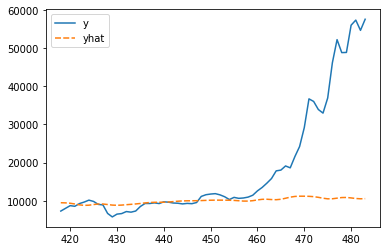

In [187]:
test_data['yhat'] = forecast['yhat']
sns.lineplot(data = test_data)

In [188]:
prophet_rmse = rmse(test_data['y'], test_data["yhat"])
prophet_mse = prophet_rmse**2
mean_value = test_data['y'].mean()

print(f' RMSE:{prophet_rmse}\n MSE:{prophet_mse}\n Mean:{mean_value}')

 RMSE:16669.014153864355
 MSE:277856032.8617302
 Mean:18078.522318503947


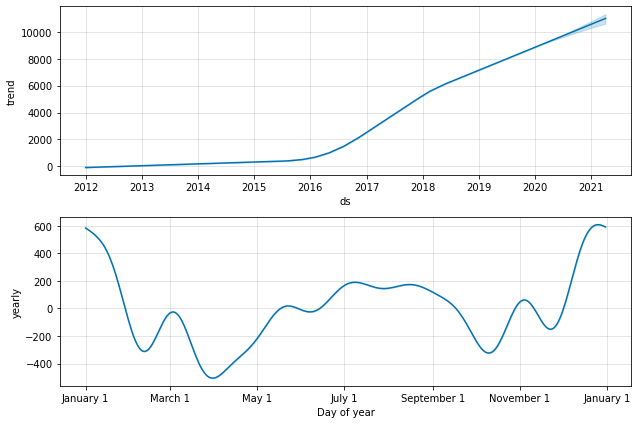

In [189]:
plt_1 =m.plot_components(forecast)

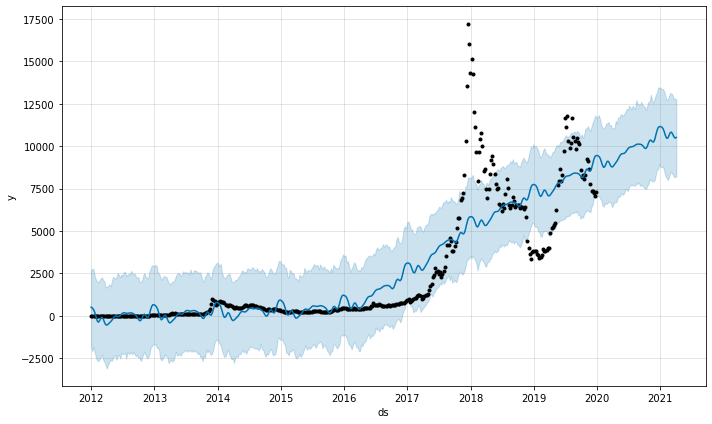

In [190]:
plt_2 = m.plot(forecast)

##Add exogenous_features

In [191]:
df_Prophet_addreg = df_Prophet_addreg.reset_index()


In [192]:
exogenous_features = ['Open_mean_lag3','Open_mean_lag7', 'Open_mean_lag30', 
                      'Open_std_lag3', 'Open_std_lag7','Open_std_lag30', 
                      'High_mean_lag3', 'High_mean_lag7', 'High_mean_lag30',
                      'High_std_lag3', 'High_std_lag7', 'High_std_lag30', 
                      'Low_mean_lag3','Low_mean_lag7', 'Low_mean_lag30',
                      'Low_std_lag3', 'Low_std_lag7','Low_std_lag30',
                      'Close_mean_lag3', 'Close_mean_lag7','Close_mean_lag30',
                      'Close_std_lag3', 'Close_std_lag7','Close_std_lag30',
                      'Volume_(BTC)_mean_lag3', 'Volume_(BTC)_mean_lag7',
                      'Volume_(BTC)_mean_lag30', 'Volume_(BTC)_std_lag3',
                      'Volume_(BTC)_std_lag7', 'Volume_(BTC)_std_lag30', 
                      'month', 'week','day', 'day_of_week']  

In [193]:

lag_features = ["Open", "High", "Low", "Close","Volume_(BTC)"]
window1 = 3
window2 = 7
window3 = 30

df_rolled_3d = df_Prophet_addreg[lag_features].rolling(window=window1, min_periods=0)
df_rolled_7d = df_Prophet_addreg[lag_features].rolling(window=window2, min_periods=0)
df_rolled_30d = df_Prophet_addreg[lag_features].rolling(window=window3, min_periods=0)

df_mean_3d = df_rolled_3d.mean().shift(1).reset_index()
df_mean_7d = df_rolled_7d.mean().shift(1).reset_index()
df_mean_30d = df_rolled_30d.mean().shift(1).reset_index()

df_std_3d = df_rolled_3d.std().shift(1).reset_index()
df_std_7d = df_rolled_7d.std().shift(1).reset_index()
df_std_30d = df_rolled_30d.std().shift(1).reset_index()

for feature in lag_features:
    df_Prophet_addreg[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature]
    df_Prophet_addreg[f"{feature}_mean_lag{window2}"] = df_mean_7d[feature]
    df_Prophet_addreg[f"{feature}_mean_lag{window3}"] = df_mean_30d[feature]
    
    df_Prophet_addreg[f"{feature}_std_lag{window1}"] = df_std_3d[feature]
    df_Prophet_addreg[f"{feature}_std_lag{window2}"] = df_std_7d[feature]
    df_Prophet_addreg[f"{feature}_std_lag{window3}"] = df_std_30d[feature]

df_Prophet_addreg.fillna(df_Prophet_addreg.mean(), inplace=True)

# df_Prophet_addreg.set_index("Timestamp", drop=False, inplace=True)
df_Prophet_addreg["month"] = df_Prophet_addreg.Timestamp.dt.month
df_Prophet_addreg["week"] = df_Prophet_addreg.Timestamp.dt.week
df_Prophet_addreg["day"] = df_Prophet_addreg.Timestamp.dt.day
df_Prophet_addreg["day_of_week"] = df_Prophet_addreg.Timestamp.dt.dayofweek
df_train = df_Prophet_addreg[df_Prophet_addreg.Timestamp < "2020"]
df_valid = df_Prophet_addreg[df_Prophet_addreg.Timestamp >= "2020"]

print('train shape :', df_train)#.shape)
print('validation shape :', df_valid)#.shape)

df_Prophet_addreg.head()

train shape :      Timestamp         Open         High          Low        Close  \
0   2012-01-01     4.611429     4.621429     4.611429     4.621429   
1   2012-01-08     6.009286     6.017321     6.009286     6.017321   
2   2012-01-15     6.847168     6.850636     6.840867     6.845145   
3   2012-01-22     6.332981     6.335673     6.329327     6.332019   
4   2012-01-29     6.124828     6.126207     6.124052     6.125431   
..         ...          ...          ...          ...          ...   
413 2019-12-01  7355.340641  7360.972397  7349.737461  7355.226190   
414 2019-12-08  7379.551985  7383.959005  7375.480366  7379.547668   
415 2019-12-15  7232.351484  7235.530138  7228.947472  7232.250254   
416 2019-12-22  7037.059651  7041.362522  7033.078004  7037.068874   
417 2019-12-29  7295.606306  7299.060268  7292.198742  7295.650094   

     Volume_(BTC)  Volume_(Currency)  Weighted_Price  Open_mean_lag3  \
0       16.702840          75.871357        4.615202     4432.450268   
1

<ipython-input-193-c758936b597b>:27: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_Prophet_addreg.fillna(df_Prophet_addreg.mean(), inplace=True)
<ipython-input-193-c758936b597b>:31: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_Prophet_addreg["week"] = df_Prophet_addreg.Timestamp.dt.week


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Open_mean_lag3,Open_mean_lag7,...,Volume_(BTC)_mean_lag3,Volume_(BTC)_mean_lag7,Volume_(BTC)_mean_lag30,Volume_(BTC)_std_lag3,Volume_(BTC)_std_lag7,Volume_(BTC)_std_lag30,month,week,day,day_of_week
0,2012-01-01,4.611429,4.621429,4.611429,4.621429,16.702840,75.871357,4.615202,4432.450268,4211.507964,...,10.604208,10.625772,10.703388,2.813921,3.528415,4.827659,1,52,1,6
1,2012-01-08,6.009286,6.017321,6.009286,6.017321,6.219625,35.272736,6.012609,4.611429,4.611429,...,16.702840,16.702840,16.702840,2.813921,3.528415,4.827659,1,1,8,6
2,2012-01-15,6.847168,6.850636,6.840867,6.845145,2.308239,16.012406,6.846930,5.310357,5.310357,...,11.461232,11.461232,11.461232,7.412753,7.412753,7.412753,1,2,15,6
3,2012-01-22,6.332981,6.335673,6.329327,6.332019,7.036892,44.270967,6.332164,5.822627,5.822627,...,8.410234,8.410234,8.410234,7.443132,7.443132,7.443132,1,3,22,6
4,2012-01-29,6.124828,6.126207,6.124052,6.125431,3.389604,20.956109,6.125839,6.396478,5.950216,...,5.188252,8.066899,8.066899,2.527417,6.115962,6.115962,1,4,29,6


In [194]:
df_train = df_train.rename(columns = {'Timestamp':'ds',"Weighted_Price":"y"})
df_valid = df_valid.rename(columns = {'Timestamp':'ds',"Weighted_Price":"y"})

In [195]:
df_train

,ds,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),y,Open_mean_lag3,Open_mean_lag7,...,Volume_(BTC)_mean_lag3,Volume_(BTC)_mean_lag7,Volume_(BTC)_mean_lag30,Volume_(BTC)_std_lag3,Volume_(BTC)_std_lag7,Volume_(BTC)_std_lag30,month,week,day,day_of_week
0,2012-01-01,4.611429,4.621429,4.611429,4.621429,16.702840,75.871357,4.615202,4432.450268,4211.507964,...,10.604208,10.625772,10.703388,2.813921,3.528415,4.827659,1,52,1,6
1,2012-01-08,6.009286,6.017321,6.009286,6.017321,6.219625,35.272736,6.012609,4.611429,4.611429,...,16.702840,16.702840,16.702840,2.813921,3.528415,4.827659,1,1,8,6
2,2012-01-15,6.847168,6.850636,6.840867,6.845145,2.308239,16.012406,6.846930,5.310357,5.310357,...,11.461232,11.461232,11.461232,7.412753,7.412753,7.412753,1,2,15,6
3,2012-01-22,6.332981,6.335673,6.329327,6.332019,7.036892,44.270967,6.332164,5.822627,5.822627,...,8.410234,8.410234,8.410234,7.443132,7.443132,7.443132,1,3,22,6
4,2012-01-29,6.124828,6.126207,6.124052,6.125431,3.389604,20.956109,6.125839,6.396478,5.950216,...,5.188252,8.066899,8.066899,2.527417,6.115962,6.115962,1,4,29,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,2019-12-01,7355.340641,7360.972397,7349.737461,7355.226190,6.692576,48613.539479,7355.472402,8502.049529,8499.792145,...,3.792899,5.104101,6.495906,1.373721,2.564863,2.898263,12,48,1,6
414,2019-12-08,7379.551985,7383.959005,7375.480366,7379.547668,2.737669,20192.900208,7380.120877,7910.135600,8362.134842,...,4.877828,5.405276,6.559520,2.064585,2.616909,2.880284,12,49,8,6
415,2019-12-15,7232.351484,7235.530138,7228.947472,7232.250254,2.563430,18620.481650,7232.664836,7491.278300,8261.090989,...,4.913184,5.243977,6.330383,2.006990,2.758510,2.902438,12,50,15,6
416,2019-12-22,7037.059651,7041.362522,7033.078004,7037.068874,4.063312,28313.958170,7037.438063,7322.414703,8105.839297,...,3.997892,4.116747,5.984212,2.335290,1.673433,2.697986,12,51,22,6


In [201]:
# df_train = df_train.append(exogenous_features)
# df_valid = df_valid.append(exogenous_features)
m2_fbp = Prophet()
for feature in exogenous_features:
   m2_fbp.add_regressor(feature)

m2_fbp.fit(df_train[["ds", "y"] + exogenous_features])
forecast2 = m2_fbp.predict(df_valid[["ds", "y"] + exogenous_features])
forecast2.head()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9qeg5yq1/6soc5rn2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9qeg5yq1/emg_6a58.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80623', 'data', 'file=/tmp/tmp9qeg5yq1/6soc5rn2.json', 'init=/tmp/tmp9qeg5yq1/emg_6a58.json', 'output', 'file=/tmp/tmp9qeg5yq1/prophet_modelk8xj3fey/prophet_model-20221216043633.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:36:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:36:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Close_mean_lag3,Close_mean_lag3_lower,Close_mean_lag3_upper,Close_mean_lag30,...,week,week_lower,week_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-05,1901.233560,5957.342443,7390.914526,1901.233560,1901.233560,1205.819724,1205.819724,1205.819724,-24.883309,...,603.190273,603.190273,603.190273,-411.008304,-411.008304,-411.008304,0.0,0.0,0.0,6643.699234
1,2020-01-12,1908.530405,5844.548220,7301.251206,1908.530405,1908.530405,1207.107956,1207.107956,1207.107956,-24.801091,...,579.650591,579.650591,579.650591,-508.839314,-508.839314,-508.839314,0.0,0.0,0.0,6589.448577
2,2020-01-19,1915.827251,6705.629930,8180.867841,1915.827251,1915.827251,1286.339450,1286.339450,1286.339450,-24.760510,...,556.110909,556.110909,556.110909,-501.076424,-501.076424,-501.076424,0.0,0.0,0.0,7406.912537
3,2020-01-26,1923.124096,7412.100065,8837.628983,1923.081114,1923.124096,1404.464337,1404.464337,1404.464337,-24.633810,...,532.571227,532.571227,532.571227,-533.503343,-533.503343,-533.503343,0.0,0.0,0.0,8134.574149
4,2020-02-02,1930.420942,7189.233136,8611.478639,1930.247554,1930.459641,1512.529845,1512.529845,1512.529845,-24.258763,...,509.031545,509.031545,509.031545,-612.562536,-612.562536,-612.562536,0.0,0.0,0.0,7896.497378


##visualize

In [227]:
forecast2.loc[:,"yhat"] 

0      6643.699234
1      6589.448577
2      7406.912537
3      8134.574149
4      7896.497378
          ...     
61    45176.662586
62    43744.726846
63    45797.548030
64    49355.920745
65    47711.855405
Name: yhat, Length: 66, dtype: float64

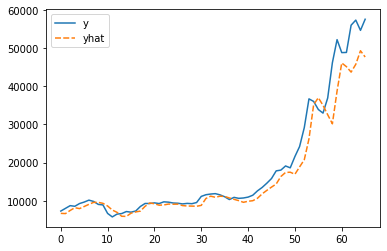

In [257]:
test_data2 = df_valid[['ds','y']]
test_data2 = test_data2.copy()
yhat = forecast2.loc[:,"yhat"].values
test_data2.insert(2,column ="yhat" ,value = yhat)
test_data2 = test_data2.reset_index(drop = True)
sns.lineplot(data = test_data2)


In [261]:
prophet_rmse2 = rmse(test_data2['y'], test_data2["yhat"])
prophet_mse2 = prophet_rmse2**2
mean_value2 = test_data2['y'].mean()

print("Before:\n"f' RMSE:{prophet_rmse}\n MSE:{prophet_mse}\n Mean:{mean_value}\n'
    "After:\n"f' RMSE:{prophet_rmse2}\n MSE:{prophet_mse2}\n Mean:{mean_value2}')

Before:
 RMSE:16669.014153864355
 MSE:277856032.8617302
 Mean:18078.522318503947
After:
 RMSE:4284.759599034018
 MSE:18359164.821514156
 Mean:18078.522318503947
